# Exploratory Data Analysis - Car Crashes Dataset
## Project Summary:
- **Author** Derek Graves
- **Date** 18 Feb 2024
- **Purpose** This project will display the use of data analysis and data inspection as well as transformation techniques that can be used on data imported from the 'Car Crashes' data set. The 'Car Crashes' data set provides a glimpse into various factors surrounding these incidents, such as the number of crashes, the presence of alcohol-related crashes, and more. We will use this dataset to explore patterns, identify trends, and gain insights into the factors contributing to road accidents. Throughout this notebook, we'll use data visualization techniques using various Python libraries to uncover hidden relationships and tell a compelling story behind the statistics.

## Environment Setup
This section provides a setup of the project through creating a virtual environment and installing required packages. See the Project README for detailed step-by-step instructions.

### Import Dependencies

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory Data Analysis

### Step 1: Data Acquisition 
Load the Car Crashes dataset into a pandas DataFrame in order to inspect the first few rows of the frame. 

In [35]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('car_crashes')

# Inspect first rows of the DataFrame
print(df.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


### Step 2: Initial Data Inspection
Display the first 10 rows of the DataFrame, check the shape, and display the data types of each column. 

In [36]:
# Display the first 10 rows of the Dataframe 

print(df.head(10))
print(df.shape)
print(df.dtypes)

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   
5   13.6     5.032    3.808          10.744       12.920       835.50   
6   10.8     4.968    3.888           9.396        8.856      1068.73   
7   16.2     6.156    4.860          14.094       16.038      1137.87   
8    5.9     2.006    1.593           5.900        5.900      1273.89   
9   17.9     3.759    5.191          16.468       16.826      1160.13   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  
5      139.91     CO  
6      167.02     CT  
7      151.4

### Step 3: Initial Descriptive Statistics
Use the DataFrame describe() method to displays statistics for each column.

In [37]:
print(df.describe())

           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.894000       10.478000    11.348000   
50%    15.600000   4.608000   4.554000       13.857000    13.775000   
75%    18.500000   6.439000   5.604000       16.140000    16.755000   
max    23.900000   9.450000  10.038000       23.661000    21.280000   

       ins_premium  ins_losses  
count    51.000000   51.000000  
mean    886.957647  134.493137  
std     178.296285   24.835922  
min     641.960000   82.750000  
25%     768.430000  114.645000  
50%     858.970000  136.050000  
75%    1007.945000  151.870000  
max    1301.520000  194.780000  


### Step 4: Initial Data Distribution
We can examine the distribution of numerical and categorical columns in the dataset to gain more insight about the data. 

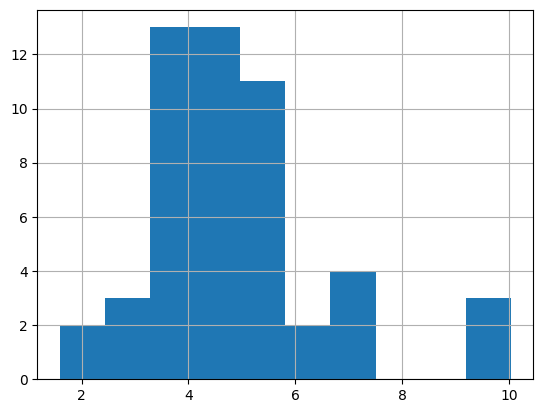

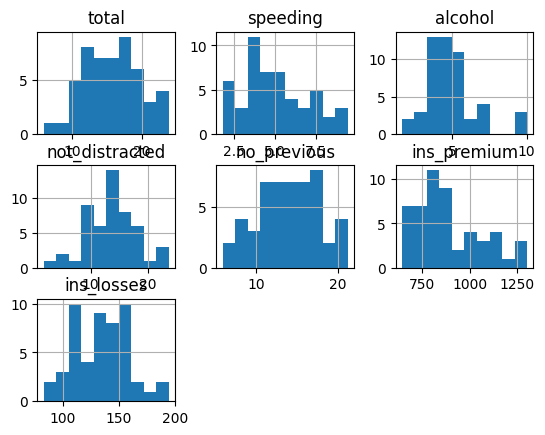

In [38]:
#Distribution for Numerical Columns

df['alcohol'].hist()

#Inspect histograms for all numerical colums and show all plots
df.hist()
plt.show()

#### Observations: The histograms above offer initial insights into the distribution of data across our numerical columns. Notably, the right-skewed distributions indicate varying degrees of variability and the presence of outliers. Across factors such as speeding, alcohol impairment, and distractions, significant disparities among states are evident, suggesting diverse patterns of driver behavior. Regarding insurance metrics, most states cluster within certain ranges, with premiums typically falling between 700 to 1100 dollars and losses averaging between 100 to 160 dollars per insured driver. These findings underscore the importance of considering geographic variations when formulating policies aimed at enhancing road safety and managing insurance risks.

### Step 5: Initial Data Distribution for Categorical Columns

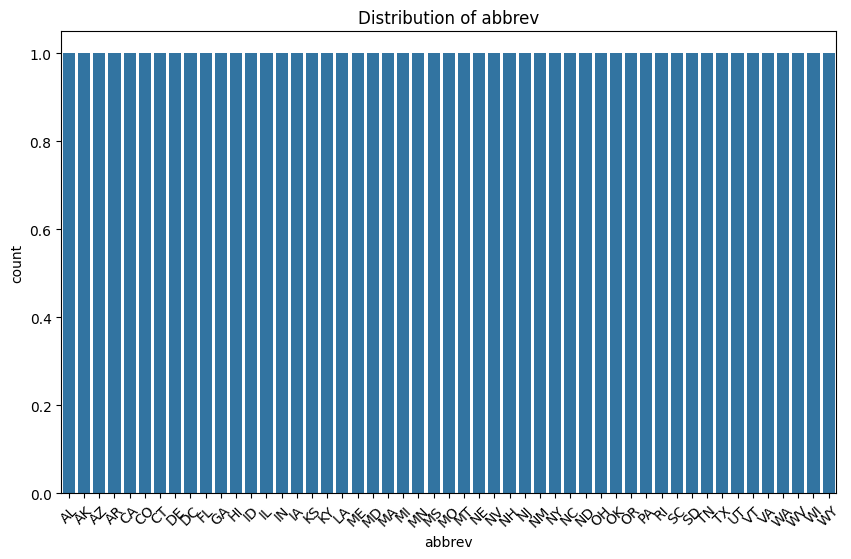

In [39]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()



#### Observations: 
- State abbreviation is the only categorical column that we have in the data set.  As such, this graph simply serves to show that each state abbreviation is represented only one time in the dataset.

### Step 6: Initial Data Transformation and Feature Engineering

In [40]:
# Rename the column 'abbrev' to 'state_abbreviation'
df.rename(columns={'abbrev': 'state_abbreviation'}, inplace=True)

In [41]:
# Add a new column 'average_insurance_cost'
df['average_insurance_cost'] = (df['ins_premium'] + df['ins_losses']) / 2

### Step 7: Initial Visualizations

#### Visualization 1: Speeding vs. Alcohol Impairment
- Goal:  To identify the relationship between the percentage of drivers involved in fatal collisions who were speeding, and those involved in fatal collisions who were alcohol-impaired. 
- Chart type: Scatter Plot


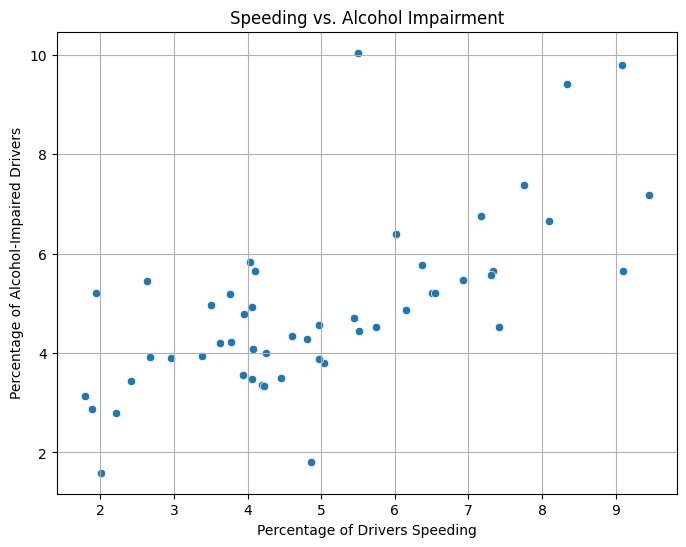

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='speeding', y='alcohol', data=df)
plt.title('Speeding vs. Alcohol Impairment')
plt.xlabel('Percentage of Drivers Speeding')
plt.ylabel('Percentage of Alcohol-Impaired Drivers')
plt.grid(True)
plt.show()


##### Observations: In the above scatterplot, we can see that there appears to be a positive correlation between the percentage of alcohol impaired drivers and percentage of drivers speeding in a given state.  This would imply that states with a higher percentage of speeding drivers also tend to have a higher percentage of alcohol impaired drivers. 

#### Visualization 2: Not Distracted Drivers vs. No Previous Accidents
- Goal:  To explore whether there is a direct relationship between the percentage of drivers involved in fatal accidents that were not discracted and the percentage of those involved in fatal accidents that had not been involved in any previous accidents. 
- Chart type: Regression Plot

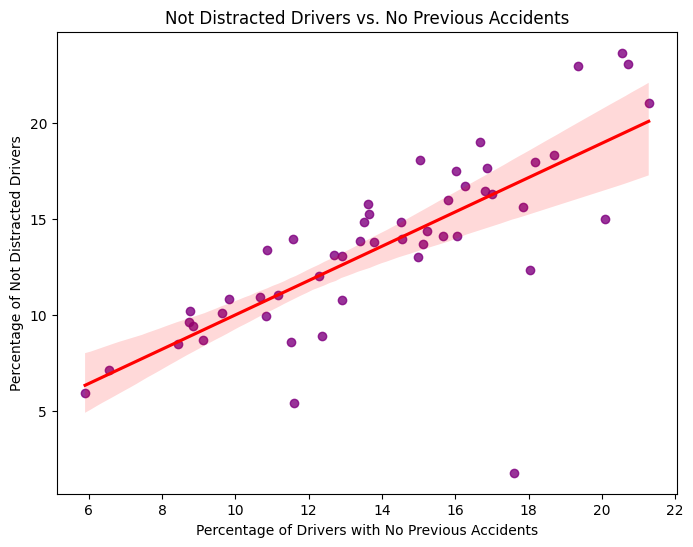

In [43]:
plt.figure(figsize=(8, 6))
sns.regplot(x='no_previous', y='not_distracted', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title('Not Distracted Drivers vs. No Previous Accidents')
plt.xlabel('Percentage of Drivers with No Previous Accidents')
plt.ylabel('Percentage of Not Distracted Drivers')
plt.show()


##### Observations: In the above regression plot, we can see what looks to be a positive relationship between not distracted drivers and drivers with no previous accidents. The closer that the scatter of the points are clustered around the line, the stronger the general relationship is thought to be. In this case, there is a bit of variation in the data, with several visible outliers that could potentially indicate unique characteristics of individual states.  Overall though, this plot helps to illustrate that the data suggests states with a higher percentage of drivers with no previous accidents may also have a higher percentage of not-distracted drivers. 

#### Visualization 3: Insurance Premiums vs. Losses by State

- Goal: Explore the relationship between insurance premiums and losses by state.
- Chart type: Scatterplot

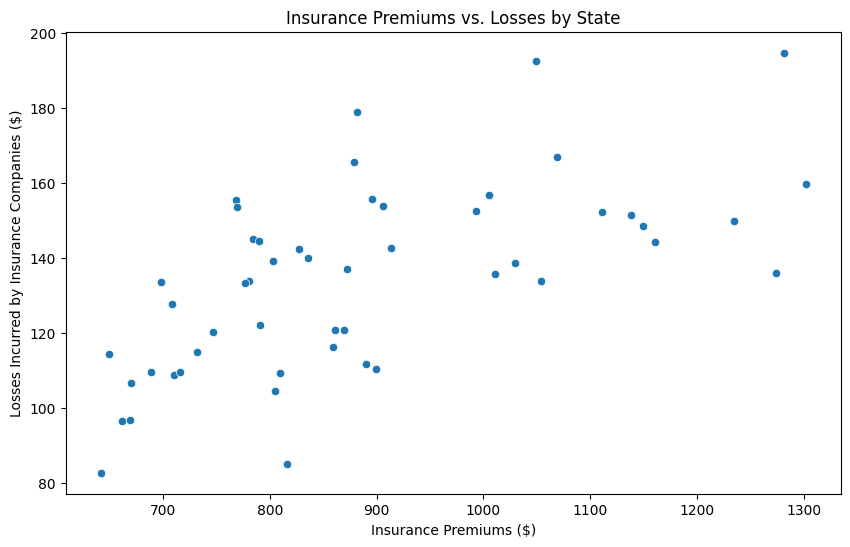

In [44]:
# Scatter plot of Insurance Premiums vs. Losses by State
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ins_premium', y='ins_losses', data=df)
plt.title('Insurance Premiums vs. Losses by State')
plt.xlabel('Insurance Premiums ($)')
plt.ylabel('Losses Incurred by Insurance Companies ($)')
plt.show()



##### Observations: The scatterplot above shows that there is generally a positive relationship between insurance premiums and losses between states.  This means that states that have higher insurance premiums also tend to have higher losses experienced by insurance companies for collisions per insured driver. Despite this general trend, we can also see that there is quite a bit of variability among states, and there are several states that appear to have outliers in the data, where some states have higher premiums but lower losses, and vice versa.  This could indicate that some states have outside factors that affect insurance premiums beyond insurance losses.  